<a href="https://colab.research.google.com/github/Miranda-Merino-Irigoyen-Jorge-Missael/Simulaci-n-2/blob/main/Metropoli_Hastings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

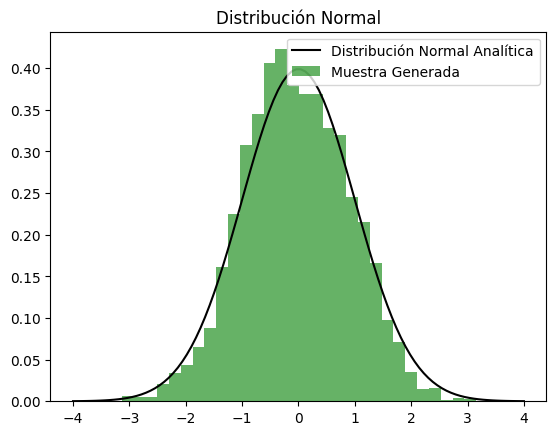

Distribución Normal: Media Muestra = -0.03573321610198396, Desviación Estándar Muestra = 0.9332880774546536
Distribución Normal Analítica: Media = 0, Desviación Estándar = 1


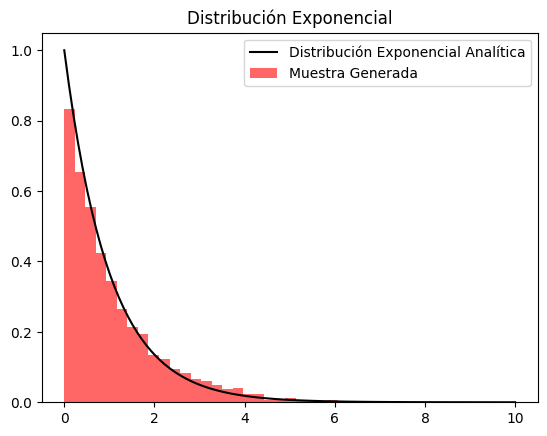

Distribución Exponencial: Media Muestra = 1.0912510746797703, Desviación Estándar Muestra = 1.0699253260777009
Distribución Exponencial Analítica: Media = 1, Desviación Estándar = 1


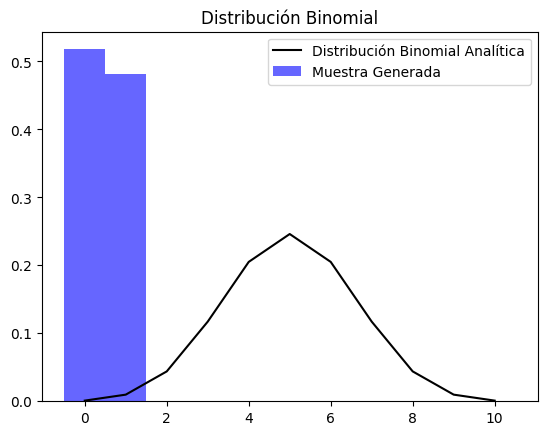

Distribución Binomial: Media Muestra = 0.49357193687176276, Desviación Estándar Muestra = 0.13672833953067015
Distribución Binomial Analítica: Media = 5.0, Desviación Estándar = 1.5811388300841898


In [4]:
#Autor: Miranda Merino Irigoyen Jorge Missael
#Fecha: 06/10/202
#Objetivo: Este programa tiene como objetivo generar muestras de 3 distribuciones estadísticas usando Metropolis-Hastings y comparar con sus distribuciones analíticas
#Versión: 1.3

################ CODIGO #######################
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

############# Funciones #######################
# Función objetivo #
def target(dist, prior, param, theta):
    if dist == 'normal':
        return st.norm(param[0], param[1]).pdf(theta)
    elif dist == 'exponencial':
        return st.expon(scale=param[0]).pdf(theta)
    elif dist == 'binomial':
        if theta < 0 or theta > 1:
            return 0
        return st.binom(param[0], theta).pmf(param[1])

# Algoritmo Metropolis-Hastings #
def metropolissampler(niters, dist, prior, theta, param, sigma):
    samples = np.zeros(niters + 1)
    samples[0] = theta
    for i in range(niters):
        theta_p = theta + st.norm(0, sigma).rvs()
        rho = min(1, target(dist, prior, param, theta_p) / target(dist, prior, param, theta))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples[i + 1] = theta
    return samples

################### Experimento #############################

# Parámetros
niters = 5000  # Número de iteraciones
sigma = 0.5  # Desviación estándar del salto propuesto

# 1. Distribución Normal
param_normal = [0, 1]  # Media y desviación estándar
theta_normal = 0.5  # Valor inicial
samples_normal = metropolissampler(niters, 'normal', None, theta_normal, param_normal, sigma)

# Gráfica analítica vs. histograma de la muestra
x = np.linspace(-4, 4, 100)
y = st.norm(param_normal[0], param_normal[1]).pdf(x)

plt.plot(x, y, label='Distribución Normal Analítica', color='black')
plt.hist(samples_normal, bins=30, density=True, alpha=0.6, color='g', label='Muestra Generada')
plt.title('Distribución Normal')
plt.legend()
plt.show()

# Media y desviación estándar de la muestra
mean_sample_normal = np.mean(samples_normal)
std_sample_normal = np.std(samples_normal)
print(f"Distribución Normal: Media Muestra = {mean_sample_normal}, Desviación Estándar Muestra = {std_sample_normal}")
print(f"Distribución Normal Analítica: Media = {param_normal[0]}, Desviación Estándar = {param_normal[1]}")


# 2. Distribución Exponencial
param_exp = [1]  # Parámetro lambda
theta_exp = 1  # Valor inicial
samples_exp = metropolissampler(niters, 'exponencial', None, theta_exp, param_exp, sigma)

# Gráfica analítica vs. histograma de la muestra
x = np.linspace(0, 10, 100)
y = st.expon(scale=param_exp[0]).pdf(x)

plt.plot(x, y, label='Distribución Exponencial Analítica', color='black')
plt.hist(samples_exp, bins=30, density=True, alpha=0.6, color='r', label='Muestra Generada')
plt.title('Distribución Exponencial')
plt.legend()
plt.show()

# Media y desviación estándar de la muestra
mean_sample_exp = np.mean(samples_exp)
std_sample_exp = np.std(samples_exp)
print(f"Distribución Exponencial: Media Muestra = {mean_sample_exp}, Desviación Estándar Muestra = {std_sample_exp}")
print(f"Distribución Exponencial Analítica: Media = {param_exp[0]}, Desviación Estándar = {param_exp[0]}")


# 3. Distribución Binomial
param_binom = [10, 5]  # Número de ensayos y éxitos
theta_binom = 0.5  # Valor inicial para theta (probabilidad de éxito)
samples_binom = metropolissampler(niters, 'binomial', None, theta_binom, param_binom, sigma)

# Gráfica analítica vs. histograma de la muestra
x = np.arange(0, 11)
y = st.binom(param_binom[0], theta_binom).pmf(x)

plt.plot(x, y, label='Distribución Binomial Analítica', color='black')
plt.hist(samples_binom, bins=np.arange(0, param_binom[0] + 2) - 0.5, density=True, alpha=0.6, color='b', label='Muestra Generada')
plt.title('Distribución Binomial')
plt.legend()
plt.show()

# Media y desviación estándar de la muestra
mean_sample_binom = np.mean(samples_binom)
std_sample_binom = np.std(samples_binom)
mean_analytic_binom = param_binom[0] * theta_binom
std_analytic_binom = np.sqrt(param_binom[0] * theta_binom * (1 - theta_binom))

print(f"Distribución Binomial: Media Muestra = {mean_sample_binom}, Desviación Estándar Muestra = {std_sample_binom}")
print(f"Distribución Binomial Analítica: Media = {mean_analytic_binom}, Desviación Estándar = {std_analytic_binom}")

